# quant-econ Solutions: Markov Asset Pricing

Solutions for http://quant-econ.net/py/markov_asset.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

Next we load the code from the lectures into a cell to have access to the functions.  This next line assumes that you have the file `asset_pricing.py` from [QuantEcon.applications](https://github.com/QuantEcon/QuantEcon.applications) in the same directory as this notebook.

In [3]:
from asset_pricing import *

## Exercise 1

First let's enter the parameters:

In [4]:

n = 5
P = 0.0125 * np.ones((n, n))
P += np.diag(0.95 - 0.0125 * np.ones(5))
s = np.array([0.95, 0.975, 1.0, 1.025, 1.05])  # state values
mc = qe.MarkovChain(P, state_values=s)

gamma = 2.0
beta = 0.94
zeta = 1.0
p_s = 150.0

Next we'll create an instance of `AssetPriceModel` to feed into the functions.

In [5]:
apm = AssetPriceModel(beta=beta, mc=mc, gamma=gamma, g=lambda x: x)

Now we just need to call the relevent functions on the data:

In [6]:
tree_price(apm)

array([ 29.47401578,  21.93570661,  17.57142236,  14.72515002,  12.72221763])

In [7]:
consol_price(apm, zeta)

array([ 753.87100476,  242.55144082,  148.67554548,  109.25108965,
         87.56860139])

In [8]:
call_option(apm, zeta, p_s)

array([ 603.87100476,  176.8393343 ,  108.67734499,   80.05179254,
         64.30843748])

Let's show the last two functions as a plot.

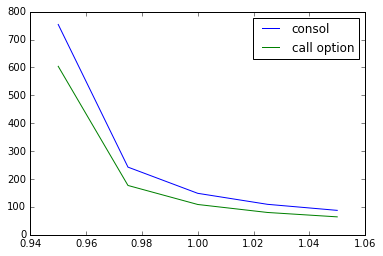

In [9]:
fig, ax = plt.subplots()
ax.plot(s, consol_price(apm, zeta), label='consol')
ax.plot(s, call_option(apm, zeta, p_s), label='call option')
ax.legend()

## Exercise 2

Here's a suitable function:

In [10]:

def finite_horizon_call_option(ap, zeta, p_s, k):
    """
    Computes k period option value.
    """
    # == Simplify names, set up matrices  == #
    beta, gamma, P, y = ap.beta, ap.gamma, ap.mc.P, ap.mc.state_values
    M = P * ap.g(y)**(- gamma)

    # == Make sure that a unique solution exists == #
    ap.test_stability(M)


    # == Compute option price == #
    p = consol_price(ap, zeta)
    w = np.zeros(ap.n)
    for i in range(k):
        # == Maximize across columns == #
        w = np.maximum(beta * M @ w, p - p_s)
        
    return w


Now let's compute the option values at `k=5` and `k=25`

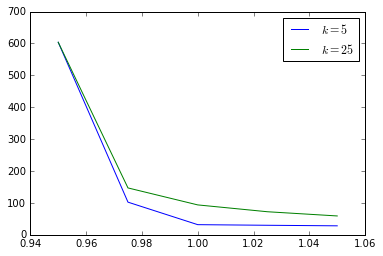

In [11]:
fig, ax = plt.subplots()
for k in [5, 25]:
    w = finite_horizon_call_option(apm, zeta, p_s, k)
    ax.plot(s, w, label=r'$k = {}$'.format(k))
ax.legend()

Not surprisingly, the option has greater value with larger $k$.  This is because the owner has a longer time horizon over which he or she may exercise the option.